In [ ]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns

from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

train_file_id = '192v66kR3bNA_wteO90dwbXfRwNL8yKCb'
test_file_id = '10DcDDSk4xttSIUk9dhObh3GGF_086ktB'

train_download = drive.CreateFile({'id': train_file_id})
test_download = drive.CreateFile({'id': test_file_id})

# Download the file to a local disc
train_download.GetContentFile('train_file.csv')
test_download.GetContentFile('test_file.csv')

# Specify the data type for the problematic column (e.g., as 'str' if it should be a string)
# If you're not sure about the correct data type, you can use 'str' to read everything as strings and then process it later.
dtype_dict = {6: 'str'}

train_df = pd.read_csv("train_file.csv", dtype=dtype_dict, low_memory=False)
test_df = pd.read_csv("test_file.csv", dtype=dtype_dict, low_memory=False)


#Inferencing parameter from ChatGPT

##1.H (absolute magnitude): This parameter provides information about the intrinsic brightness of the asteroid and could be indicative of its size and composition.

##2.diameter (object diameter): The size of the asteroid in kilometers could be an important feature for classification.

##3.albedo (geometric albedo): The reflectivity of the asteroid's surface, which can be important for understanding its composition.

##4.eccentricity (e): A measure of how elliptical the orbit is, which is a fundamental parameter for orbit classification.

##5.semi-major axis (a): The average distance from the sun, which is a key parameter for understanding the asteroid's orbit.

##6.perihelion distance (q): The closest distance to the sun as the asteroid travels in its orbit.

##7.inclination (i): The angle of the orbital plane with respect to the plane of the solar system, which is important for orbit classification.

##8.aphelion distance (w): The furthest distance a celestial body gets from the sun.

##9.moid (earth minimum orbit intersection distance): The minimum distance between the orbit of the asteroid and Earth's orbit.

## ###see also the Description from UMD:https://pdssbn.astro.umd.edu/data_other/objclass.shtml

In [ ]:


# Assume 'class' is the target variable, and features are selected accordingly
# Modify this based on your actual dataset
features = ['H', 'diameter', 'albedo', 'e', 'a', 'q', 'i', 'w', 'moid']
target = 'class_num'

# Extract features and target from the train and test datasets
X_train = train_df[features]
y_train = train_df[target]

X_test = test_df[features]
y_test = test_df[target]

# Impute missing values in features with mean values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Initialize and train the KNN classifier with weighted distances
k = 5  # Number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=k, weights='distance')  # Using 'distance' for weighted KNN
knn_classifier.fit(X_train_scaled, y_train)

# Predict using the trained model
y_pred = knn_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print a classification report for detailed metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.98646529209861
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    257041
           1       0.97      0.77      0.86      8380
           2       1.00      0.99      1.00      2443
           3       0.93      0.93      0.93      3792
           4       0.94      0.87      0.90      5556
           5       0.97      0.99      0.98      6068
           6       0.85      0.87      0.86      2521
           7       0.93      0.73      0.82       569
           8       1.00      1.00      1.00      1022
           9       0.98      0.93      0.95       136
          10       0.89      0.71      0.79        24
          11       1.00      0.50      0.67         4
          12       1.00      1.00      1.00         1

    accuracy                           0.99    287557
   macro avg       0.96      0.87      0.90    287557
weighted avg       0.99      0.99      0.99    287557



PCA

In [ ]:
###################data processing: 1. impute for missing data & 2. normalize data 3. split data into x(feature) & y (target)#####################################
from sklearn.impute import SimpleImputer
#training data
#drop useless parameters or those with too high missing rate
newdf_train_drop = train_df.drop(columns=['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix',
                                          'diameter', 'albedo',
                                          'diameter_sigma','orbit_id',
                                          'equinox', 'class', 'class_num'])

#replace string value with ints
newdf_train_drop['neo'] = newdf_train_drop['neo'].replace({'Y': 1, 'N': 0})
newdf_train_drop['pha'] = newdf_train_drop['pha'].replace({'Y': 1, 'N': 0})

#impute
imputer = SimpleImputer(strategy='mean')
newdf_train = imputer.fit_transform(newdf_train_drop)


new_y_train = train_df['class_num']
new_x_train = newdf_train

new_x_train = scaler.fit_transform(new_x_train) #normalize


#testing data
#drop useless parameters or those with too high missing rate
newdf_test = test_df.drop(columns=['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix',
                                   'diameter', 'albedo',
                                   'diameter_sigma','orbit_id',
                                   'equinox', 'class', 'class_num'])
#replace string value with ints
newdf_test['neo'] = newdf_test['neo'].replace({'Y': 1, 'N': 0})
newdf_test['pha'] = newdf_test['pha'].replace({'Y': 1, 'N': 0})

#impute
imputer = SimpleImputer(strategy='mean')  # You can choose an appropriate imputation strategy
newdf_test = imputer.fit_transform(newdf_test)


new_y_test = test_df['class_num']
new_x_test = newdf_test
new_x_test = scaler.fit_transform(new_x_test)

from sklearn.decomposition import PCA

pca = PCA(n_components = 0.7)

x_train_pca = pca.fit_transform(new_x_train)
x_test_pca = pca.transform(new_x_test)

pca.explained_variance_ratio_
print(f"Reduced number of features from {new_x_train.shape[1]} to {x_train_pca.shape[1]}")
print(f"Reduced number of features from {new_x_test.shape[1]} to {x_test_pca.shape[1]}")

Reduced number of features from 34 to 9
Reduced number of features from 34 to 9


kNN function(111101013)

In [ ]:
from sklearn.neighbors import KDTree
from tqdm import tqdm
from scipy import stats
def k_nearest_neighbors_batch_2(X_train, y_train, x_test, k):
    batch_size=1000
    num_train = X_train.shape[0]
    num_test = x_test.shape[0]
    y_pred = []
    ytrain_t = y_train.values.flatten()
    tree = KDTree(X_train, leaf_size=30, metric='minkowski', p = 2)


    for i in range(0, num_test, batch_size):
        batch_end = min(i + batch_size, num_test)
        #print('batch_end: ', batch_end)
        x_batch = x_test[i:batch_end]

        distances = np.zeros((batch_end - i, num_train))
        #for j in tqdm(range(0, num_test, batch_size), desc="Predicting"):
        distances, indices = tree.query(x_test[i:batch_end], k) # distances and indices of 3 closest neighbors


        nearest_neighbor_labels = np.take(ytrain_t, indices)
        predicted_labels, _ = stats.mode(nearest_neighbor_labels, axis=1) # use majority voting

        y_pred.extend(predicted_labels)
    return np.array(y_pred)


from sklearn.metrics import accuracy_score

a = []

for k in range(1, 9):
  print('apply knn, k = ', k)
  y_pred_k1 = k_nearest_neighbors_batch_2(X_train_scaled, y_train, X_test_scaled, k)
  #y_pred_k2 = k_nearest_neighbors_batch_2(x_train_pca, new_y_train, x_test_pca, 5)

  print('check accuracy of k = ', k)
  accuracy1 = accuracy_score(y_test, y_pred_k1)
  #accuracy2 = accuracy_score(new_y_test, y_pred_k2)
  print('ver1: Accuracy: ', accuracy1)
  #print('ver2: Accuracy: ', accuracy2)

  a.append(accuracy1)

print(a)



In [ ]:
def weighted_k_nearest_neighbors_batch(X_train, y_train, x_test, k):
    batch_size=1000
    num_train = X_train.shape[0]
    num_test = x_test.shape[0]
    y_pred = []
    ytrain_t = y_train.values.flatten()
    tree = KDTree(X_train, leaf_size=30, metric='minkowski', p = 2)


    for i in range(0, num_test, batch_size):
        batch_end = min(i + batch_size, num_test)
        print('batch_end: ', batch_end)
        x_batch = x_test[i:batch_end]

        distances, indices = tree.query(x_test[i:batch_end], k) # distances and indices of k closest neighbors
        distances_inverse = 1/(distances)
        weights = distances_inverse

        nearest_neighbor_labels = np.take(ytrain_t, indices)


        for t in range(batch_end-i):
            weights_sum = np.zeros(100)# to store weights of each label of every row of test data

            for j in range(k):
              #print('t: ', t, ' j: ', j)
              weights_sum[nearest_neighbor_labels[t][j]] +=  weights[t][j]

            predicted_label = np.argmax(weights_sum)
            y_pred.append(predicted_label)
    return np.array(y_pred)


from sklearn.metrics import accuracy_score

a = []

for k in range(1, 9):
  print('apply knn, k = ', k)
  y_pred_k1 = weighted_k_nearest_neighbors_batch(X_train_scaled, y_train, X_test_scaled, k)

  print('check accuracy of k = ', k)
  accuracy1 = accuracy_score(y_test, y_pred_k1)
  print('ver1: Accuracy: ', accuracy1)


  a.append(accuracy1)

print(a)

#Correlation Analysis

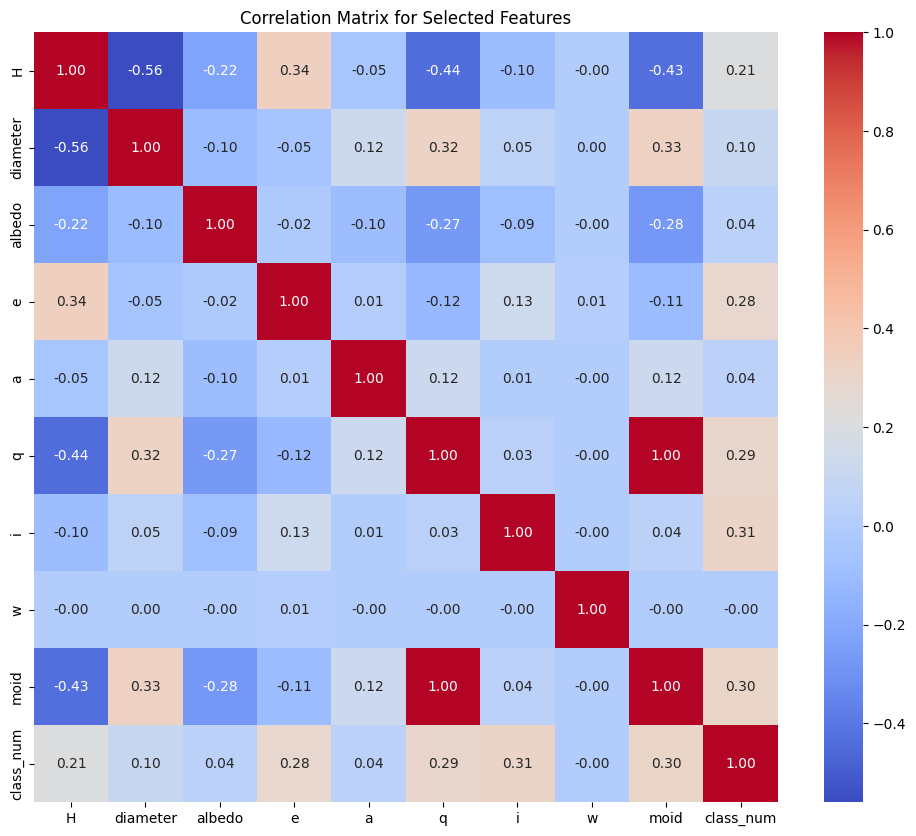

In [ ]:
# Load the data and preprocess as needed
# Assuming df is the DataFrame with your data

# Select the features you've chosen for analysis
selected_features = ['H', 'diameter', 'albedo', 'e', 'a', 'q', 'i', 'w', 'moid']

selected_data = train_df[selected_features + ['class_num']]  # Add 'class' assuming it's the target

# Compute the correlation matrix for the selected features
correlation_matrix = selected_data.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Selected Features')
plt.show()

#Recursive Feature Elimination (RFE):

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# Assuming X_train and y_train are the training features and target, respectively

# Initialize the model and RFE
model = RandomForestClassifier()  # Or any other model of your choice
rfe = RFE(model, n_features_to_select=5)  # Choose the number of features to select

# Fit RFE
fit = rfe.fit(X_train_scaled, y_train)

In [ ]:
# Print the ranking of features
print("Num Features: %s" % (fit.n_features_))
print("Feature Ranking: %s" % (fit.ranking_))
print(selected_features)
# Assuming X_train contains the feature names
selected_feature_names = [feature for feature, selected in zip(X_train.columns, fit.support_) if selected]

# Print the selected feature names
#I run multipule times and the top 3 result are not always the same
#print("Selected Feature Names:", selected_feature_names)

Num Features: 5
Feature Ranking: [2 3 5 1 1 1 1 4 1]
['H', 'diameter', 'albedo', 'e', 'a', 'q', 'i', 'w', 'moid']


##We found that H, e, a, q, moid are most influential, after some trials we found that e, a, q may be the best features

#Choose the k value

In [ ]:
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9] #serach from 1 to 9
accuracies = []
for k in k_values:
  features = ['e', 'a', 'q']
  target = 'class_num'
  # Extract features and target from the train and test datasets
  X_train = train_df[features]
  y_train = train_df[target]

  X_test = test_df[features]
  y_test = test_df[target]

  # Impute missing values in features with mean values
  imputer = SimpleImputer(strategy='mean')
  X_train_imputed = imputer.fit_transform(X_train)
  X_test_imputed = imputer.transform(X_test)

  # Standardize the features
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train_imputed)
  X_test_scaled = scaler.transform(X_test_imputed)

  # Initialize and train the KNN classifier with weighted distances
  knn_classifier = KNeighborsClassifier(n_neighbors=k, weights='distance')  # Using 'distance' for weighted KNN
  knn_classifier.fit(X_train_scaled, y_train)

  # Predict using the trained model
  y_pred = knn_classifier.predict(X_test_scaled)

  # Evaluate the model
  accuracy = accuracy_score(y_test, y_pred)
  accuracies.append(accuracy)
#print(X_train_scaled.shape)

In [ ]:
user-defined function

In [ ]:
#Best performance with user-defined function happens at k = 8 using weighted kNN
print('apply knn, k = ', 8)
y_pred_k1 = weighted_k_nearest_neighbors_batch(X_train_scaled, y_train, X_test_scaled, 8)

print('check accuracy of k = ', 8)
accuracy1 = accuracy_score(y_test, y_pred_k1)
print('ver1: Accuracy: ', accuracy1)


test_ids = test_df.index.values

# Create a dataframe for submission
submission_df = pd.DataFrame({
    'IDX': test_ids,
    'Target': y_pred
})

# Save the dataframe to a CSV file
submission_df.to_csv('submission_new.csv', index=False)

from google.colab import files
files.download('submission_new.csv')


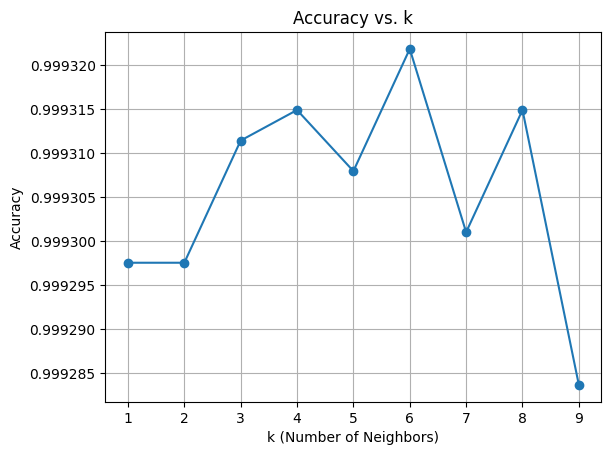

In [ ]:
# Plotting Accuracy vs. k
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k')
plt.grid(True)
plt.show()

##Save prediction csv file to colab

In [ ]:
# Modify this based on your actual dataset
features = ['e', 'a', 'q']
target = 'class_num'

# Extract features and target from the train and test datasets
X_train = train_df[features]
y_train = train_df[target]

X_test = test_df[features]
y_test = test_df[target]

# Impute missing values in features with mean values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Initialize and train the KNN classifier with weighted distances
k = 6  # Number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=k, weights='distance')  # Using 'distance' for weighted KNN
knn_classifier.fit(X_train_scaled, y_train)

# Predict using the trained model
y_pred = knn_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

test_ids = test_df.index.values

# Create a dataframe for submission
submission_df = pd.DataFrame({
    'IDX': test_ids,
    'Target': y_pred
})

# Save the dataframe to a CSV file
submission_df.to_csv('submission.csv', index=False)

from google.colab import files
files.download('submission.csv')

'''
# Name of the output CSV file
csv_file = 'output.csv'

# Open the CSV file for writing
with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)

    # Write the header
    writer.writerow(['IDX', 'class_num'])

    # Write data (index, value) to the CSV file
    for i, value in enumerate(y_pred):
        writer.writerow([i, value])

# Move the file to the Colab working directory
import shutil
shutil.move('output.csv', '/gdrive/MyDrive/Colab Notebooks/groupchallenge-knn-competition-pds/output.csv')

print(f'CSV file saved as {csv_file}')
'''

Accuracy: 0.9993218735763693


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

"\n# Name of the output CSV file\ncsv_file = 'output.csv'\n\n# Open the CSV file for writing\nwith open(csv_file, 'w', newline='') as file:\n    writer = csv.writer(file)\n\n    # Write the header\n    writer.writerow(['IDX', 'class_num'])\n\n    # Write data (index, value) to the CSV file\n    for i, value in enumerate(y_pred):\n        writer.writerow([i, value])\n\n# Move the file to the Colab working directory\nimport shutil\nshutil.move('output.csv', '/gdrive/MyDrive/Colab Notebooks/groupchallenge-knn-competition-pds/output.csv')\n\nprint(f'CSV file saved as {csv_file}')\n"

## Generate the confusion matrix

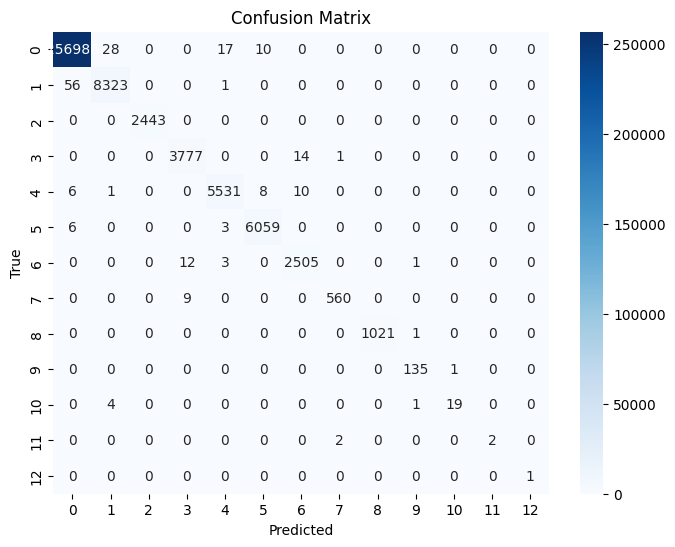

Accuracy: 0.9993218735763693
Precision: 0.9993213574894828
Recall: 0.9993218735763693
F1 Score: 0.9993196730602956


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
#class_names = ['AMO','APO','AST','ATE','CEN','HYA','IEO','IMB','MBA','MCA','OMB','PAA','TJN','TNO']
class_names = range(0,13)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

#Per-class metrics

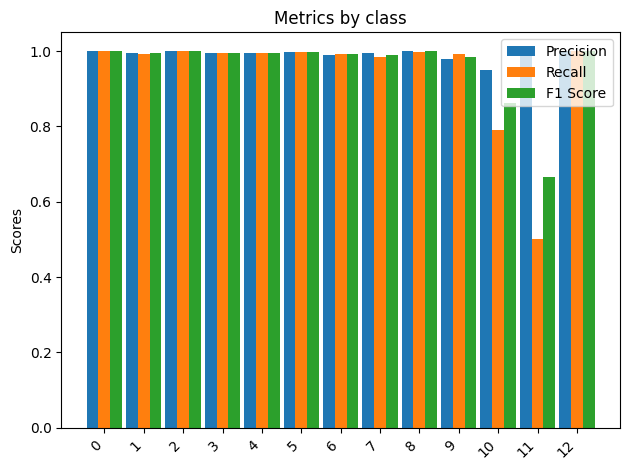

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Assuming y_true and y_pred are your true labels and predicted labels, respectively

# Compute precision, recall, and F1 score for each class
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None)

# Class labels
class_labels = [i for i in range(len(precision))]

# Data for the plot
x = np.arange(len(class_labels))
width = 0.3

# Create the figure and axes
fig, ax = plt.subplots()

# Plotting precision, recall, and F1 score for each class
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1, width, label='F1 Score')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Metrics by class')
ax.set_xticks(x)
ax.set_xticklabels(class_labels)
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


#Learning Curve


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


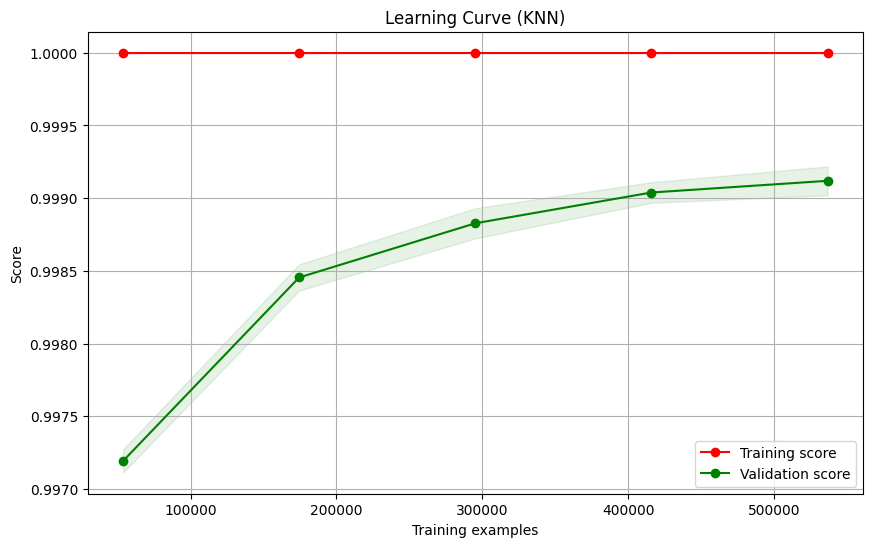

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define a function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validation score")

    plt.legend(loc="best")
    return plt

# Plot the learning curve
plot_learning_curve(knn_classifier, "Learning Curve (KNN)", X_train, y_train, cv=5, n_jobs=-1)
plt.show()


oversampling

In [ ]:
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN
# Instantiate the SMOTE class
#smote = SMOTE(sampling_strategy='auto',k_neighbors=3, random_state=42)
borderline_smote = BorderlineSMOTE(sampling_strategy='auto', k_neighbors=3, random_state=42, kind='borderline-1')

# Fit and apply SMOTE to your training data
x_train_resampled, y_train_resampled = borderline_smote.fit_resample(X_train_scaled, y_train)


print(X_train_scaled.shape)
print(x_train_resampled.shape)


(670967, 3)
(7789717, 3)


[0.999304485719353, 0.999304485719353, 0.9992662324339174, 0.9992523221483045, 0.9992175464342722, 0.9991758155774333, 0.9991097417207718, 0.9990575781497234, 0.9989915042930619]


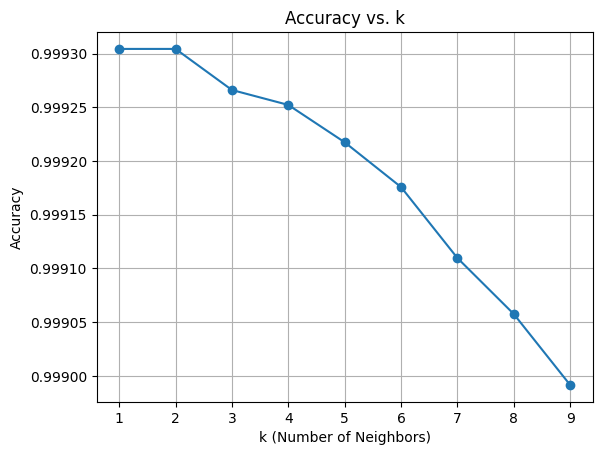

In [ ]:
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9] #serach from 1 to 9
accuracies = []
for k in k_values:
  knn_classifier = KNeighborsClassifier(n_neighbors=k, weights='distance')  # Using 'distance' for weighted KNN
  knn_classifier.fit(x_train_resampled, y_train_resampled)


  # Predict using the trained model
  y_pred = knn_classifier.predict(X_test_scaled)

  # Evaluate the model
  accuracy = accuracy_score(y_test, y_pred)

  # Evaluate the model
  accuracy = accuracy_score(y_test, y_pred)
  accuracies.append(accuracy)

print(accuracies)
# Plotting Accuracy vs. k
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k')
plt.grid(True)
plt.show()

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=1, weights='distance')  # Using 'distance' for weighted KNN
knn_classifier.fit(x_train_resampled, y_train_resampled)


# Predict using the trained model
y_pred = knn_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# Use the index of X_test as the test IDs
test_ids = test_df.index.values

# Create a dataframe for submission
submission_df = pd.DataFrame({
    'IDX': test_ids,
    'Target': y_pred
})

# Save the dataframe to a CSV file
submission_df.to_csv('submission.csv', index=False)

from google.colab import files
files.download('submission.csv')

0.999304485719353


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Class seperatoin visualization

[599209  19738   5758   8853  13075  14262   5998   1183   2460    361
     53     13      4]


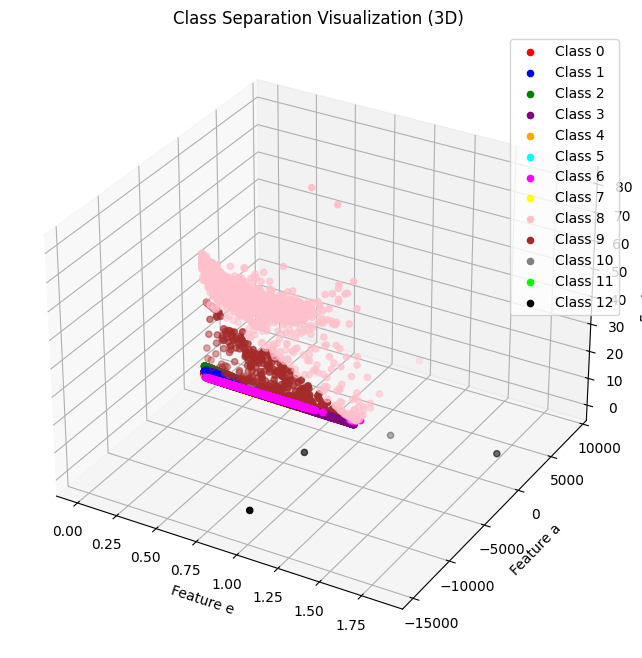

In [ ]:
unique_labels, label_counts = np.unique(y_train, return_counts=True)
print(label_counts)

# Create a list of colors for each class
colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'pink', 'brown', 'gray', 'lime', 'black']
markers = ['o', 's', 'x', '^', '*', 'D', 'v', 'p', '>', 'H', 'd', '<', '`']
# Create a 3D scatter plot for each class
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

i = 0
for class_label in unique_labels:
    class_data = train_df[train_df['class_num'] == class_label]

    # Extract the three numerical features for the class
    feature_e = class_data['e']
    feature_a = class_data['a']
    feature_q = class_data['q']

    # Create a 3D scatter plot for the class
    ax.scatter(feature_e, feature_a, feature_q, c=colors[i], label=f'Class {class_label}')
    i = i+1
ax.set_xlabel('Feature e')
ax.set_ylabel('Feature a')
ax.set_zlabel('Feature q')
ax.set_title('Class Separation Visualization (3D)')
ax.legend()
plt.show()